In [1]:
import os
import sys
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

sys.path.append(os.getcwd() + "/../")

import bfcnn
from bfcnn.backbone_blocks import details
from bfcnn.delta import delta_xy_magnitude

2023-05-24 08:47:21.309554: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-24 08:47:21.349072: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-24 08:47:21.349711: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-24 08:47:22.129146: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/arxwn/Repositories/blind_image_denoising/venv/lib/python3.8/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not su

In [2]:
# setup environment
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
tf.compat.v1.enable_eager_execution
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [3]:
# setup variables
INPUT_SHAPE = (None, None, 1)
IMAGE_PATH = "../images/test/etc/lena.jpg"

In [4]:
x = \
    tf.keras.preprocessing.image.load_img(
        path=IMAGE_PATH,
        color_mode="grayscale",
        target_size=(256, 256))

x = tf.keras.preprocessing.image.img_to_array(x)
x = np.array([x])
x = ((x / 255.0) * 2.0) - 1.0

In [5]:
x_delta = details(input_layer=x)

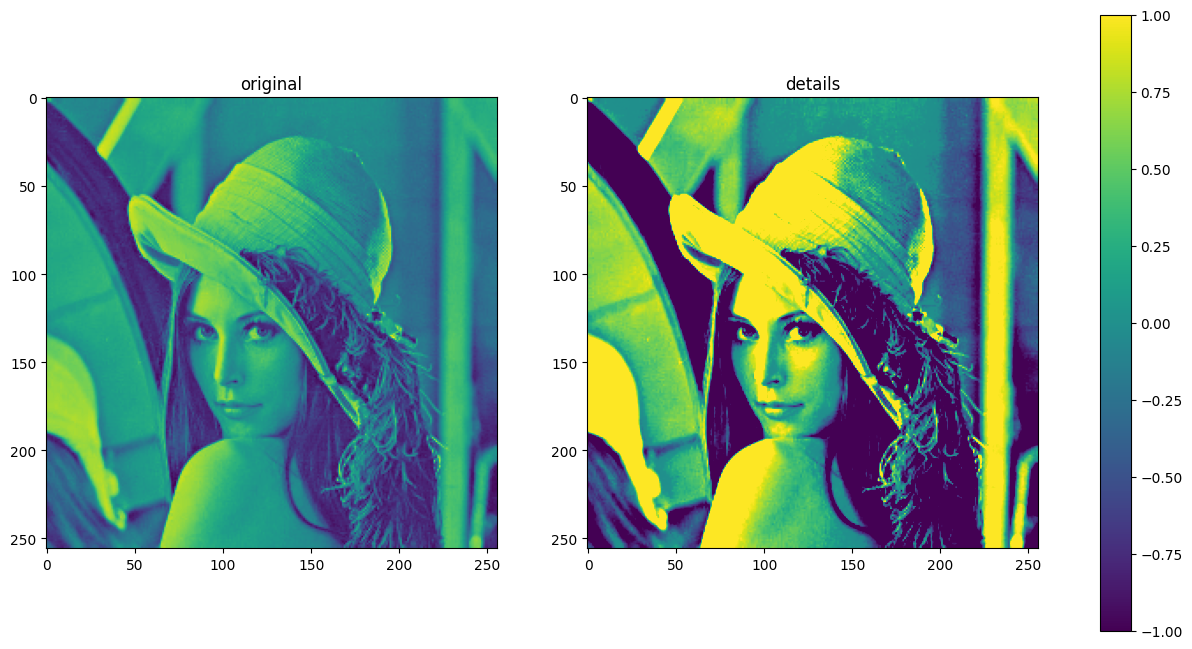

In [12]:
norm = plt.Normalize(-1,+1)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
# ---
im = axes[0].imshow(x[0,:,:,0], norm=norm)
axes[0].set_title(f"original")
# ---
im = axes[1].imshow(x_delta[0,:,:,0], norm=norm)
axes[1].set_title(f"details")

fig.colorbar(im, ax=axes.ravel().tolist())
plt.show()